# DELETE Region

- Region: [25050350-25552650]
- Window size: 100
- Sam configuration:

```
"sam_read_config":{
    "max_depth":1000,
    "ignore_orphans":false,
    "truncate":true,
    "quality_threshold":20,
    "add_indels":true
  },
```

In [1]:
import sys
sys.path.append("../")

In [2]:
from itertools import cycle, islice

In [3]:
from sklearn import mixture
from sklearn import metrics
from sklearn.cluster import KMeans

In [4]:
import numpy as np
from scipy.stats import kde
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
sns.set(color_codes=True)

In [6]:
def load_data_file(filename):

    with open(filename) as file:
        context = file.read()
        size = len(context)
        arraystr= context[1:size-1]
        arraystr = arraystr.split(',')
        region_means = [float(item) for item in arraystr]
        return region_means

In [7]:
wga_mean_file = "/home/a/ag568/wga_windows_mean_0_DELETE.txt"
no_wga_mean_file = "/home/a/ag568/no_wga_windows_mean_0_DELETE.txt"
gc_file = "/home/a/ag568/windows_gc_0_DELETE.txt"

In [8]:
wga_mu = load_data_file(filename=wga_mean_file)
no_wga_mu = load_data_file(filename=no_wga_mean_file)
gc = load_data_file(filename=gc_file)

In [9]:
assert len(wga_mu) == len(no_wga_mu)
assert len(gc) == len(wga_mu)

In [10]:
print("Size of WGA sample {0}".format(len(wga_mu)))
print("WGA max: {0}".format(max(wga_mu)))
print("WGA min: {0}".format(min(wga_mu)))
print("WGA mean: {0}".format(np.mean(wga_mu)))
print("WGA var: {0}".format(np.var(wga_mu)))

Size of WGA sample 4967
WGA max: 46.2
WGA min: 0.0
WGA mean: 15.660620092611232
WGA var: 84.47452351321014


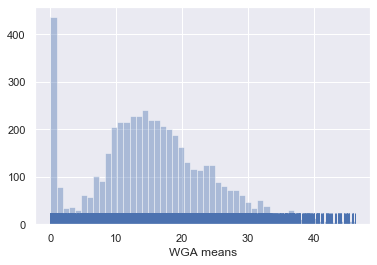

In [11]:
sns.distplot(wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("WGA means")
plt.show()

In [12]:
print("NO-WGA size {0}".format(len(no_wga_mu)))
print("NO-WGA max: {0}".format(max(no_wga_mu)))
print("NO-WGA min: {0}".format(min(no_wga_mu)))
print("NO-WGA mean: {0}".format(np.mean(no_wga_mu)))
print("NO-WGA var: {0}".format(np.var(no_wga_mu)))

NO-WGA size 4967
NO-WGA max: 33.88
NO-WGA min: 0.0
NO-WGA mean: 14.670295953291726
NO-WGA var: 47.26055141231099


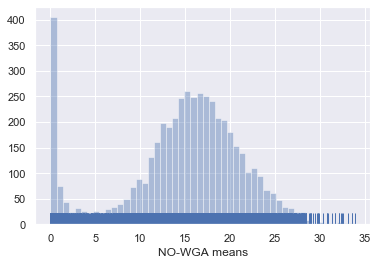

In [13]:
sns.distplot(no_wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("NO-WGA means")
plt.show()

In [14]:
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#kernel= kde.gaussian_kde(np.vstack([no_wga_mu, wga_mu]))
#xi, yi = np.mgrid[min_:max_:nbins*1j,
#                    min_:max_:nbins*1j]
#zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues') 
#plt.contour(xi, yi, zi.reshape(xi.shape) )

#plt.show()

In [15]:
X = np.stack((no_wga_mu, wga_mu), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

Covariance matrix: 
 [[47.27006824 37.56663403]
 [37.56663403 84.49153409]]
 Eigenvalues: 
 [ 23.95692524 107.80467709]
 Eigenvectors: 
 [[-0.84968149  0.52729627]
 [ 0.52729627  0.84968149]]


In [16]:
ratio = []
for no_wga, wga  in zip(no_wga_mu, wga_mu):
    ratio.append((wga + 1)/(no_wga + 1))
    
ratio = np.array(ratio)
print("NaN in ratio: ", np.any(np.isnan(ratio)))
print("Max ratio: ", max(ratio))
print("Min ratio: ", min(ratio))
X = np.stack((no_wga_mu, wga_mu, ratio), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

NaN in ratio:  False
Max ratio:  6.22
Min ratio:  0.12961876832844574
Covariance matrix: 
 [[47.27006824 37.56663403 -0.80914512]
 [37.56663403 84.49153409  2.63114092]
 [-0.80914512  2.63114092  0.26024351]]
 Eigenvalues: 
 [4.97930670e-02 2.41369416e+01 1.07835111e+02]
 Eigenvectors: 
 [[ 0.06463985  0.84748554 -0.52686805]
 [-0.05979533 -0.52373412 -0.84978061]
 [ 0.99611556 -0.08643394 -0.01682159]]


In [17]:
#from mpl_toolkits import mplot3d
#fig = plt.figure(figsize=(20,10))
#ax = plt.axes(projection='3d')
#ax.scatter3D(no_wga_mu, wga_mu, ratio, c=ratio, cmap='viridis', linewidth=0.5);
#ax.set_xlabel('NO-WGA')
#ax.set_ylabel('WGA')
#ax.set_zlabel('Ratio')

In [18]:
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
print("Pearson correlation: ", pearson)

Pearson correlation:  0.5944325350503195


In [19]:
#fig, axs = plt.subplots(1, 1)#, figsize=(9, 3))
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#v, w = linalg.eigh(cov)
    
#angle = np.arctan2(w[0][1], w[0][0])
#angle = 180. * angle / np.pi  # convert to degrees
#v = 2. * np.sqrt(2.) * np.sqrt(v)
#ell = mpl.patches.Ellipse(means, v[0], v[1], 180. + angle, color='darkorange')
#ell.set_alpha(.6)
#axs.add_patch(ell)
#plt.show()

In [20]:
print("GC size {0}".format(len(gc)))
print("GC max: {0}".format(max(gc)))
print("GC min: {0}".format(min(gc)))
print("GC mean: {0}".format(np.mean(gc)))
print("GC var: {0}".format(np.var(gc)))

GC size 4967
GC max: 0.88
GC min: 0.12
GC mean: 0.4626837125025166
GC var: 0.010450719974298662


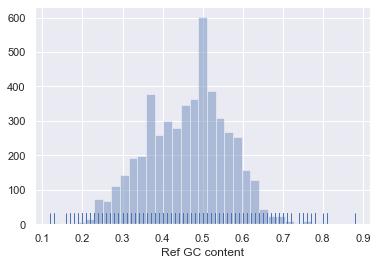

In [21]:
sns.distplot(gc, bins=35, kde=False, rug=True)
plt.xlabel("Ref GC content")
plt.show()

In [22]:
def make_data_array(wga_mu, no_wga_mu, gc, use_ratio, use_gc):
    data = []
    
    if use_ratio and use_gc:
        for no_wga_val, wga_val,gc_val in zip(no_wga_mu, wga_mu, gc):
            data.append([no_wga_val, wga_val, (wga_val + 1)/(no_wga_val + 1), gc_val])
    elif use_ratio:
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga,  (wga + 1)/(no_wga + 1)])
    elif use_gc:
        
        for no_wga_val, wga_val , gc_val in zip(no_wga_mu, wga_mu,  gc):
            data.append([no_wga_val, wga_val, gc_val])
    else:
        
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga ])
        
    return data

In [23]:
def kmeans_clustering(clusters, data, no_wga_mu, wga_mu):
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        kmeans = KMeans(n_clusters=nclusters)
        kmeans.fit(X=data)
        labels = kmeans.labels_
        centers = np.array(kmeans.cluster_centers_)

        calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
        print("Calinski score: ", calinski_harabasz_score)
        davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
        print("Davies score: ", davies_bouldin_score)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))

        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        #plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [24]:
def gmm_clustering(clusters, data, cov_type, tol,
                   max_itrs, n_init, no_wga_mu, wga_mu):
    
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        gmm = mixture.GaussianMixture(n_components=nclusters,
                                      covariance_type=cov_type,
                                      tol=tol, max_iter=max_itrs,
                                      n_init=n_init)
        gmm.fit(data)
        print("Converged: ", gmm.converged_)
        print("BIC: ", gmm.bic(data))
        labels = gmm.predict(data)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))


        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [25]:
N_CLUSTERS = [2, 3, 4, 5]

## Two means 

In [26]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=False, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 2)

### KMeans Clustering

Number of clusters  2
Calinski score:  4917.283932896098
Davies score:  0.779348182425466


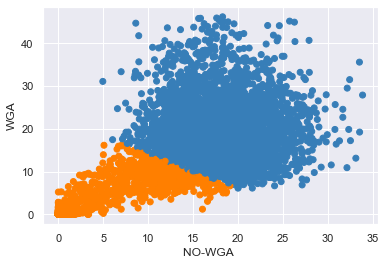

Number of clusters  3
Calinski score:  6810.192210534633
Davies score:  0.7186595002764461


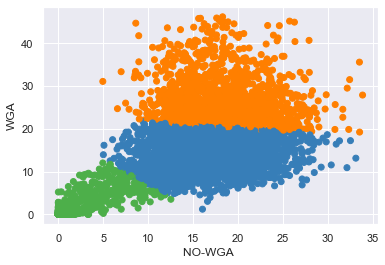

Number of clusters  4
Calinski score:  6637.7610327153425
Davies score:  0.8552705733604903


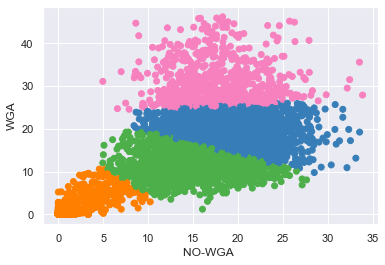

Number of clusters  5
Calinski score:  6712.303195569064
Davies score:  0.8192249138343423


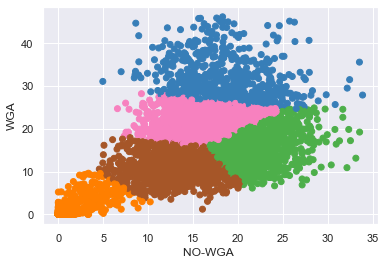

In [27]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)


### GMM Clustering

### ```full```

Number of clusters  2
Converged:  True
BIC:  62801.688067083225


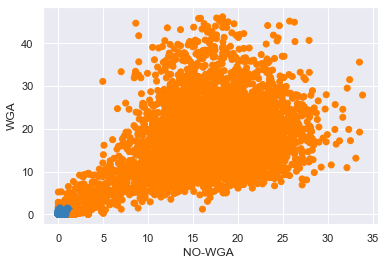

Number of clusters  3
Converged:  True
BIC:  61751.66756549307


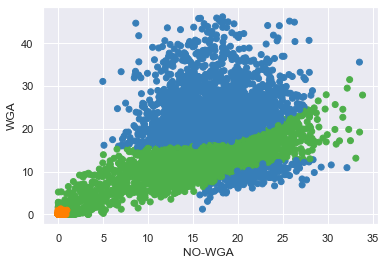

Number of clusters  4
Converged:  True
BIC:  57125.59100840147


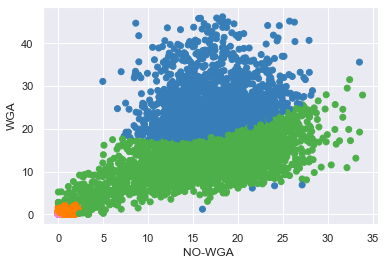

Number of clusters  5
Converged:  True
BIC:  56927.91210470391


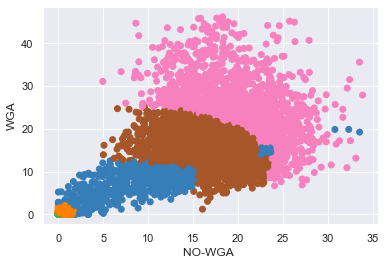

In [28]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)


### ```tied```

Number of clusters  2
Converged:  True
BIC:  65934.23262470722


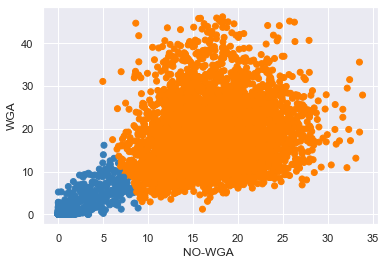

Number of clusters  3
Converged:  True
BIC:  64931.696134728016


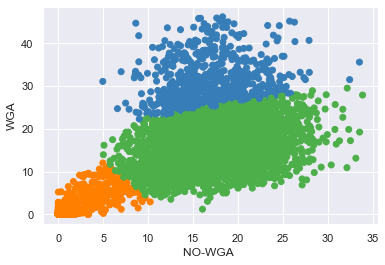

Number of clusters  4
Converged:  True
BIC:  64679.82762352459


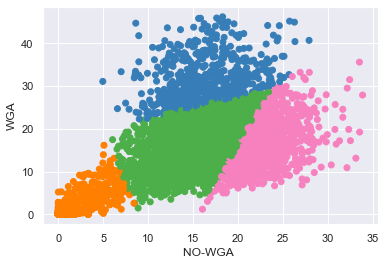

Number of clusters  5
Converged:  True
BIC:  64290.42542088999


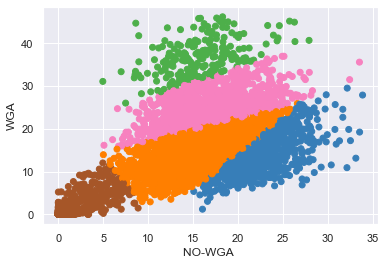

In [29]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, 
               cov_type='tied', max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```diag```

Number of clusters  2
Converged:  True
BIC:  63566.524051889086


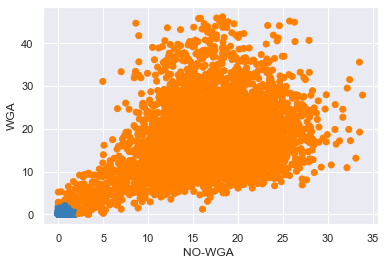

Number of clusters  3
Converged:  True
BIC:  58507.54447121919


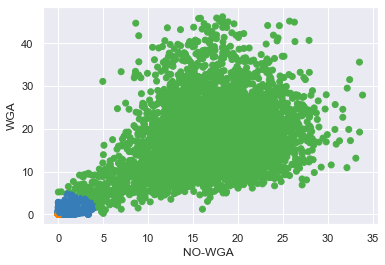

Number of clusters  4
Converged:  True
BIC:  57689.922909955785


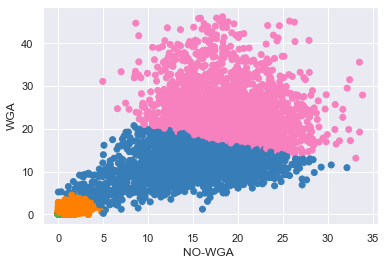

Number of clusters  5
Converged:  True
BIC:  57010.68156918071


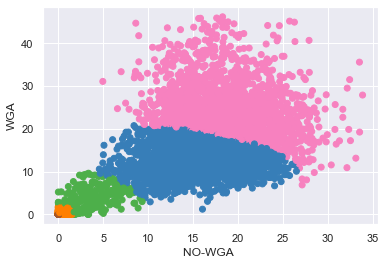

In [30]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```spherical```

Number of clusters  2
Converged:  True
BIC:  64349.33392518879


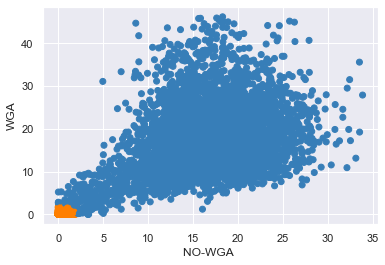

Number of clusters  3
Converged:  True
BIC:  63079.17510172654


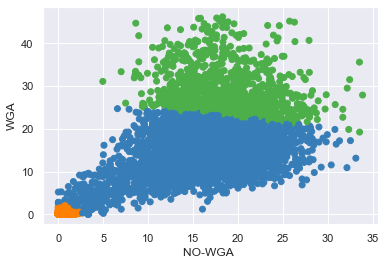

Number of clusters  4
Converged:  True
BIC:  57939.67441783419


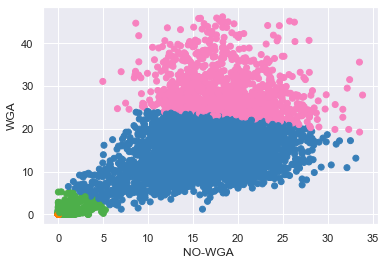

Number of clusters  5
Converged:  True
BIC:  57213.42515108769


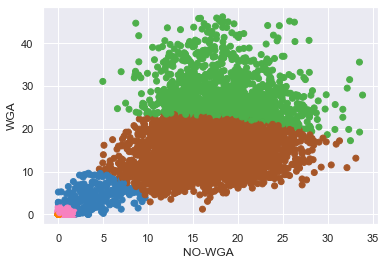

In [31]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

## Two means + Ratio

In [32]:



data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=True, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 3)

### KMeans

Number of clusters  2
Calinski score:  4898.651594461513
Davies score:  0.7802075976309346


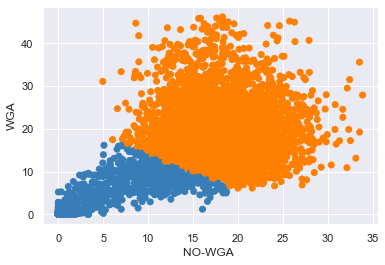

Number of clusters  3
Calinski score:  6780.453146107542
Davies score:  0.7203762270068054


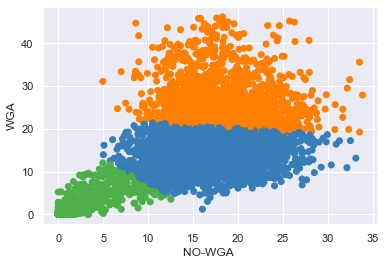

Number of clusters  4
Calinski score:  6601.459016355956
Davies score:  0.8569503164033252


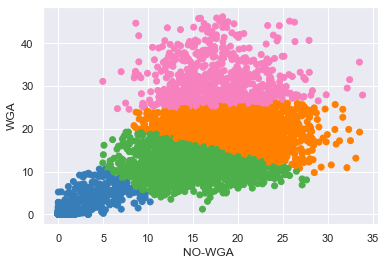

Number of clusters  5
Calinski score:  6674.066941795604
Davies score:  0.819197121960246


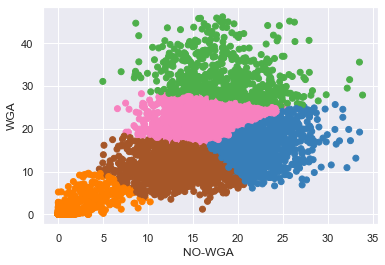

In [33]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### GMM

### ```full```

Number of clusters  2
Converged:  True
BIC:  57095.845166186555


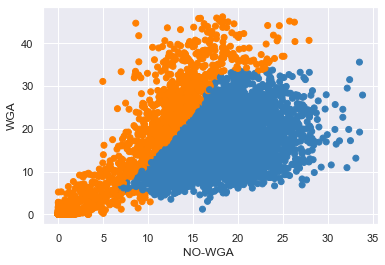

Number of clusters  3
Converged:  True
BIC:  52409.61459382712


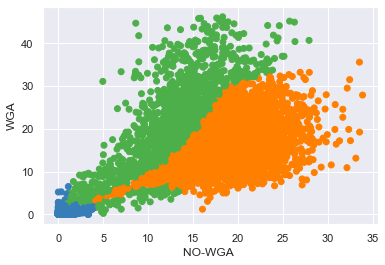

Number of clusters  4
Converged:  True
BIC:  47955.33684039157


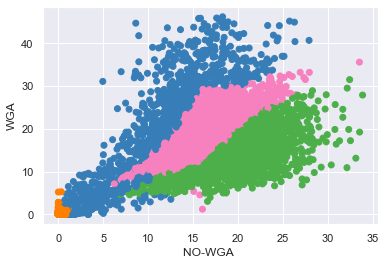

Number of clusters  5
Converged:  True
BIC:  41630.22586577318


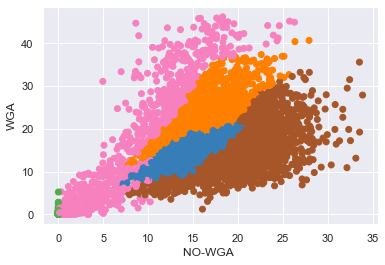

In [34]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```tied```

Number of clusters  2
Converged:  True
BIC:  65198.83515968872


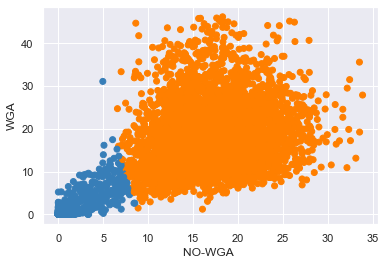

Number of clusters  3
Converged:  True
BIC:  64208.484861323006


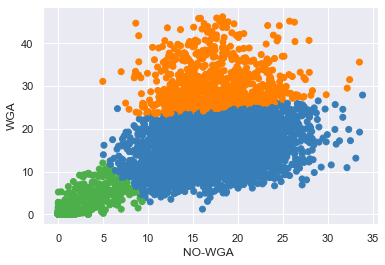

Number of clusters  4
Converged:  True
BIC:  64128.16243284154


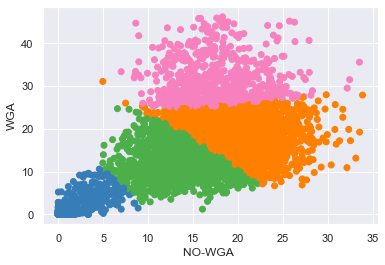

Number of clusters  5
Converged:  True
BIC:  62900.55497218054


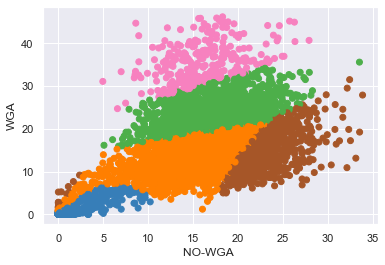

In [35]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-3, cov_type='tied',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```diag```

Number of clusters  2
Converged:  True
BIC:  70827.98383393965


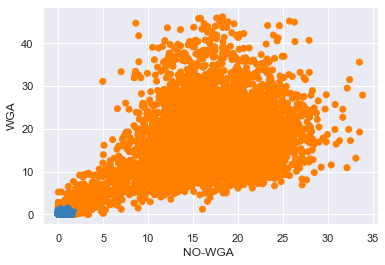

Number of clusters  3
Converged:  True
BIC:  67443.7278796808


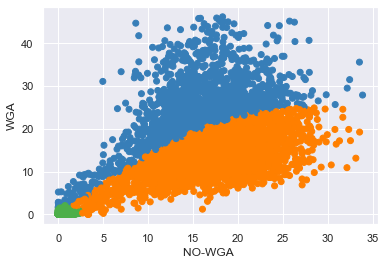

Number of clusters  4
Converged:  True
BIC:  65889.35269366547


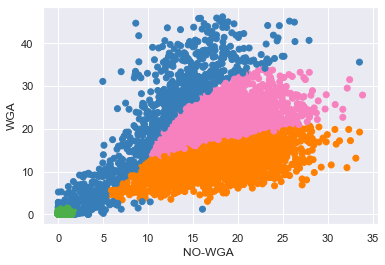

Number of clusters  5
Converged:  True
BIC:  58272.5976542738


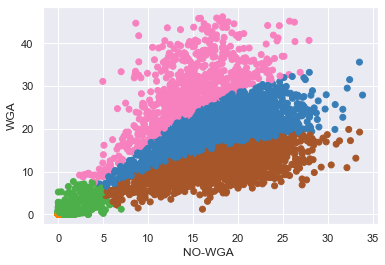

In [36]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```spherical```

Number of clusters  2
Converged:  True
BIC:  89302.49948656243


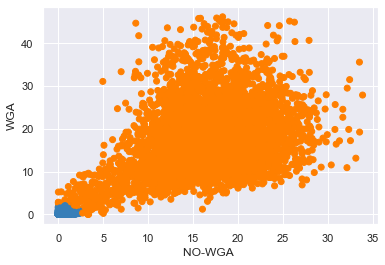

Number of clusters  3
Converged:  True
BIC:  85521.73902514904


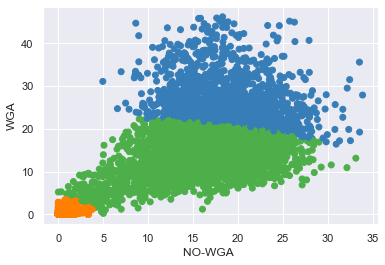

Number of clusters  4
Converged:  True
BIC:  77215.6953176351


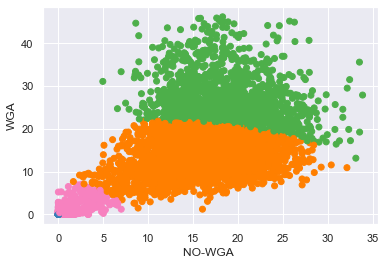

Number of clusters  5
Converged:  True
BIC:  75570.39837665136


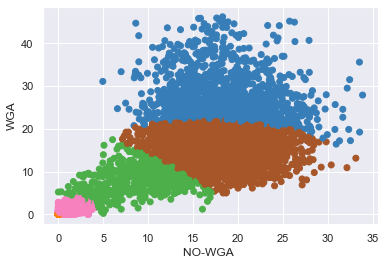

In [37]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)